In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import itertools
import collections
import nltk

In [2]:
df = pd.read_csv("feb_data_compiled.csv") 
df = df.drop(columns=['Unnamed: 0','index','Unnamed: 0.1','subreddit'])

In [3]:
df.sort_values('created_utc')

,author,body,created_utc,id,created
873,Backlight-Bowlclear,we're fucked,1609441202,ghmqcun,1.609423e+09
874,bazookatroopa,SMH I told you all to be bullish on DASH at $1...,1609441202,ghmqctw,1.609423e+09
872,elitedmillz,Yeah because they’re trying to keep a small mi...,1609441203,ghmqcw0,1.609423e+09
871,reubenschakenultras,Uh oh,1609441203,ghmqcx3,1.609423e+09
869,lulubutts,yeah i dont think i ever want to do naked call...,1609441205,ghmqd1y,1.609423e+09
...,...,...,...,...,...
1663571,DonJohnDave,Silver is definitely next!,1612021199,gldj3cy,1.612003e+09
1663576,PopeVsJesus,Can you do AMC now? Are they de-grossing that ...,1612021199,gldj3bg,1.612003e+09
1663572,Mast3rGenius,Buy buy buy,1612021199,gldj3cr,1.612003e+09
1663575,3JaneTessier-Ashpool,"And if they did, they likely only have a few s...",1612021199,gldj3bh,1.612003e+09


In [4]:
#data cleaning - deleting [removed] posts/comments
del_list=[]
for i in range(len(df)):
    if (df['author'][i]=="[deleted]"):
        del_list.append(i)
df = df.drop(index = del_list)
df.columns = ['author','text','created_utc','user_id','created']

In [5]:
df.isnull().sum()

author         0
text           2
created_utc    0
user_id        0
created        0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

author         0
text           0
created_utc    0
user_id        0
created        0
dtype: int64

In [7]:
#removing usernames
df['text'] = df['text'].str.replace(r'@[^\s]+','',regex=True)

#removing hyperlinks
df['text']=df['text'].str.replace(r'\bhttp[s]*[^\s]+','' ,regex=True)

#removing hashtags
df['text'] = df['text'].str.replace(r'#[^\s]+','',regex = True)
df

#removing numbers
df['text'] = df['text'].str.replace(r"\b[0-9]\w+",'', regex = True)

#converting to lowercase
df['text'] = df['text'].str.lower()

In [8]:
words_in_tweet = [tweet.lower().split() for tweet in df['text']]
all_words = list(itertools.chain(*words_in_tweet))

#Removing most commonly used words in English such as To, I, we, etc so that they don't affect the analysis. We have added a separate dictionary that includes these most common words.
stop_path = 'stop_words2.txt'
stop = open(stop_path, "r")
stop_words = []
for word in stop.read().split():
        stop_words.append(word)
stop.close()
##
stop_words.append('it’s')
stop_words.append('i’m')
stop_words.append('don’t')
all_words = [word for word in all_words if word not in stop_words]


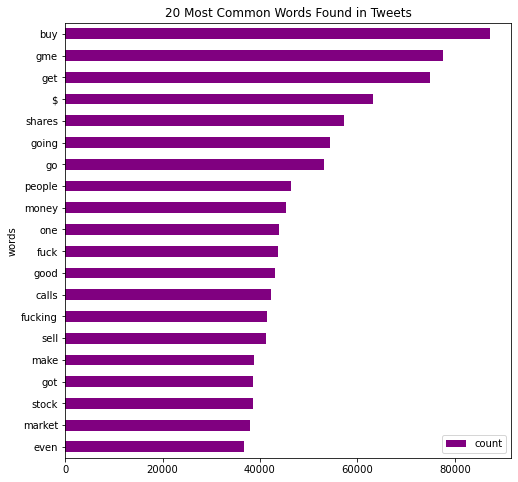

In [9]:
count_words = collections.Counter(all_words)
clean_tweets = pd.DataFrame(count_words.most_common(20),
                             columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
# Plot horizontal bar graph
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("20 Most Common Words Found in Tweets")

plt.show()

In [10]:
count_words.most_common(40)

[('buy', 87243),
 ('gme', 77630),
 ('get', 74878),
 ('$', 63218),
 ('shares', 57156),
 ('going', 54264),
 ('go', 53125),
 ('people', 46374),
 ('money', 45324),
 ('one', 43847),
 ('fuck', 43753),
 ('good', 43061),
 ('calls', 42202),
 ('fucking', 41356),
 ('sell', 41255),
 ('make', 38674),
 ('got', 38580),
 ('stock', 38533),
 ('market', 38036),
 ('even', 36730),
 ('still', 36368),
 ('bought', 36168),
 ('see', 35079),
 ('🚀', 34065),
 ('time', 33996),
 ('shit', 33360),
 ('back', 32116),
 ('short', 30391),
 ('gonna', 30071),
 ('day', 28467),
 ('price', 28125),
 ('buying', 27819),
 ('right', 27767),
 ('big', 27594),
 ('way', 27190),
 ('hold', 27172),
 ('need', 26975),
 ('could', 26963),
 ('much', 26700),
 ('want', 26476)]

In [11]:
#removing punctuation marks ### COME HERE AT END (! marks)
df['text'] = df['text'].str.replace(r'[^A-Za-z\s]','',regex=True)

In [12]:
df

,author,text,created_utc,user_id,created
0,ifsksndfhsowo,i bought at what is the smart way to make mo...,1609442199,ghms8hz,1.609424e+09
1,Trenchcoat_Economics,how long could you have been holding it that y...,1609442197,ghms8c7,1.609424e+09
2,ImARomosexual,no but they lose big on tsla puts,1609442196,ghms89a,1.609424e+09
3,arigold940,lol why did spy just randomly moon for no reason,1609442195,ghms87i,1.609424e+09
4,bigkev2569,gild gang we mooning jan,1609442192,ghms80d,1.609424e+09
...,...,...,...,...,...
1664562,bapnbrunchberries,is something thats even possible,1612021024,gldirj3,1.612003e+09
1664563,Sbemail,keep in mind that the hedge funds are full of ...,1612021024,gldirj1,1.612003e+09
1664564,Bitesizedplanet,yup gonna buy a switch from gamestop when i ge...,1612021023,gldiri7,1.612003e+09
1664567,Mast3rGenius,lol dont use this scenario as a basis to inves...,1612021023,gldirh9,1.612003e+09


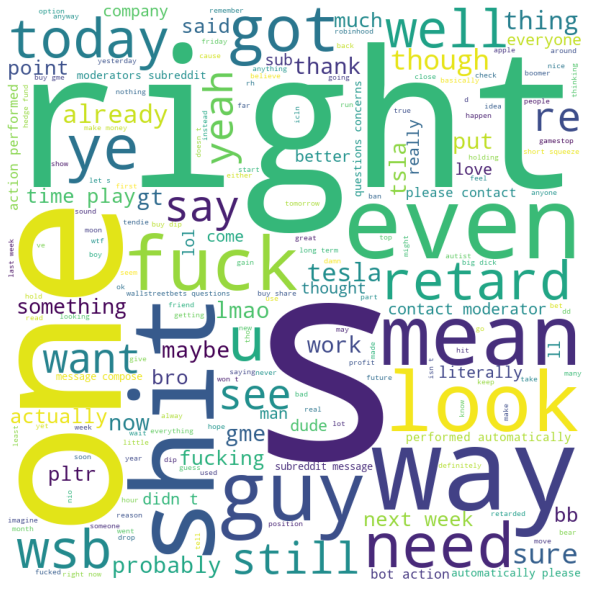

In [13]:
all_words2 = all_words
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
comment_words = ''
  
comment_words += " ".join(all_words2)+" "
    
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color = 'white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [14]:
## Sentiment Analysis using Vader from NLTK

In [15]:
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [16]:
a = 'This was a bad movie.'
dict1 = sid.polarity_scores(a)
#dict1.get('pos')
dict1

{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'compound': -0.5423}

In [17]:
flist = list(df['text'])

In [18]:
slist = []

for i in range(len(flist)):
    temp = sid.polarity_scores(flist[i])
    slist.append(temp)

In [19]:
df['sentiments'] = slist
df

,author,text,created_utc,user_id,created,sentiments
0,ifsksndfhsowo,i bought at what is the smart way to make mo...,1609442199,ghms8hz,1.609424e+09,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp..."
1,Trenchcoat_Economics,how long could you have been holding it that y...,1609442197,ghms8c7,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,ImARomosexual,no but they lose big on tsla puts,1609442196,ghms89a,1.609424e+09,"{'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'comp..."
3,arigold940,lol why did spy just randomly moon for no reason,1609442195,ghms87i,1.609424e+09,"{'neg': 0.169, 'neu': 0.615, 'pos': 0.215, 'co..."
4,bigkev2569,gild gang we mooning jan,1609442192,ghms80d,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...,...,...,...
1664562,bapnbrunchberries,is something thats even possible,1612021024,gldirj3,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1664563,Sbemail,keep in mind that the hedge funds are full of ...,1612021024,gldirj1,1.612003e+09,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp..."
1664564,Bitesizedplanet,yup gonna buy a switch from gamestop when i ge...,1612021023,gldiri7,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1664567,Mast3rGenius,lol dont use this scenario as a basis to inves...,1612021023,gldirh9,1.612003e+09,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp..."


In [20]:
clist=[]
i=0
for i in range(df.shape[0]):
    temp0 = slist[i]
    temp1 = temp0.get('compound')
    clist.append(temp1)
df['compound_score']=clist
df

,author,text,created_utc,user_id,created,sentiments,compound_score
0,ifsksndfhsowo,i bought at what is the smart way to make mo...,1609442199,ghms8hz,1.609424e+09,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4019
1,Trenchcoat_Economics,how long could you have been holding it that y...,1609442197,ghms8c7,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,ImARomosexual,no but they lose big on tsla puts,1609442196,ghms89a,1.609424e+09,"{'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'comp...",-0.6310
3,arigold940,lol why did spy just randomly moon for no reason,1609442195,ghms87i,1.609424e+09,"{'neg': 0.169, 'neu': 0.615, 'pos': 0.215, 'co...",0.1531
4,bigkev2569,gild gang we mooning jan,1609442192,ghms80d,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
...,...,...,...,...,...,...,...
1664562,bapnbrunchberries,is something thats even possible,1612021024,gldirj3,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1664563,Sbemail,keep in mind that the hedge funds are full of ...,1612021024,gldirj1,1.612003e+09,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.7684
1664564,Bitesizedplanet,yup gonna buy a switch from gamestop when i ge...,1612021023,gldiri7,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1664567,Mast3rGenius,lol dont use this scenario as a basis to inves...,1612021023,gldirh9,1.612003e+09,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.4215


In [21]:
from datetime import date,time,datetime
import datetime as dt
timez = df['created_utc']
list_days = []

for time in timez:
        x = dt.datetime.fromtimestamp(time).date()
        list_days.append(x)

In [22]:
df['date'] = list_days
df

,author,text,created_utc,user_id,created,sentiments,compound_score,date
0,ifsksndfhsowo,i bought at what is the smart way to make mo...,1609442199,ghms8hz,1.609424e+09,"{'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...",0.4019,2021-01-01
1,Trenchcoat_Economics,how long could you have been holding it that y...,1609442197,ghms8c7,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2021-01-01
2,ImARomosexual,no but they lose big on tsla puts,1609442196,ghms89a,1.609424e+09,"{'neg': 0.462, 'neu': 0.538, 'pos': 0.0, 'comp...",-0.6310,2021-01-01
3,arigold940,lol why did spy just randomly moon for no reason,1609442195,ghms87i,1.609424e+09,"{'neg': 0.169, 'neu': 0.615, 'pos': 0.215, 'co...",0.1531,2021-01-01
4,bigkev2569,gild gang we mooning jan,1609442192,ghms80d,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2021-01-01
...,...,...,...,...,...,...,...,...
1664562,bapnbrunchberries,is something thats even possible,1612021024,gldirj3,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2021-01-30
1664563,Sbemail,keep in mind that the hedge funds are full of ...,1612021024,gldirj1,1.612003e+09,"{'neg': 0.0, 'neu': 0.791, 'pos': 0.209, 'comp...",0.7684,2021-01-30
1664564,Bitesizedplanet,yup gonna buy a switch from gamestop when i ge...,1612021023,gldiri7,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2021-01-30
1664567,Mast3rGenius,lol dont use this scenario as a basis to inves...,1612021023,gldirh9,1.612003e+09,"{'neg': 0.0, 'neu': 0.811, 'pos': 0.189, 'comp...",0.4215,2021-01-30


In [26]:
list = df['text']
list2 = []
for sentence in list:
    if "gme" in str(sentence):
        list2.append(sentence)
len(list2) # number of posts/comments containing "gme"

88442

In [27]:
df_gme = df[df['text'].str.contains("gme") | df['text'].str.contains("gamestop") ]
df_gme

,author,text,created_utc,user_id,created,sentiments,compound_score,date
32,TheLilThnake,im gme so hard,1609442174,ghms6s2,1.609424e+09,"{'neg': 0.384, 'neu': 0.616, 'pos': 0.0, 'comp...",-0.2183,2021-01-01
108,acridboomstick,im balls deep in pltr but something told me to...,1609442083,ghms0r9,1.609424e+09,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.5267,2021-01-01
123,ChicknNugBuds,the dd for gme is amazing so much quality and ...,1609442072,ghmrzzw,1.609424e+09,"{'neg': 0.058, 'neu': 0.726, 'pos': 0.216, 'co...",0.8316,2021-01-01
124,NoirDior,im deepfuckingvalues long lost brother and i t...,1609442071,ghmrzxk,1.609424e+09,"{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'comp...",-0.3182,2021-01-01
145,plomii,someone fill my gme order for calls its open,1609442045,ghmry5a,1.609424e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2021-01-01
...,...,...,...,...,...,...,...,...
1664547,CitrusAbyss,this doesnt get enough attention gme was fucki...,1612021026,gldirq7,1.612003e+09,"{'neg': 0.169, 'neu': 0.651, 'pos': 0.18, 'com...",0.0440,2021-01-30
1664548,1_o_7,just an fyi email i just got from my uk broker...,1612021026,gldirpr,1.612003e+09,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.9799,2021-01-30
1664551,Noble_Nonsense,can you buy gme shares using vanguard in the u...,1612021026,gldirp1,1.612003e+09,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.6597,2021-01-30
1664560,EDC_Jacob,its also a lot of new people to investing who ...,1612021024,gldirju,1.612003e+09,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,2021-01-30


In [28]:
df_gme = df_gme[df_gme['compound_score']!=0]
df_gme #removing those entries which have compound_score = 0

,author,text,created_utc,user_id,created,sentiments,compound_score,date
32,TheLilThnake,im gme so hard,1609442174,ghms6s2,1.609424e+09,"{'neg': 0.384, 'neu': 0.616, 'pos': 0.0, 'comp...",-0.2183,2021-01-01
108,acridboomstick,im balls deep in pltr but something told me to...,1609442083,ghms0r9,1.609424e+09,"{'neg': 0.0, 'neu': 0.793, 'pos': 0.207, 'comp...",0.5267,2021-01-01
123,ChicknNugBuds,the dd for gme is amazing so much quality and ...,1609442072,ghmrzzw,1.609424e+09,"{'neg': 0.058, 'neu': 0.726, 'pos': 0.216, 'co...",0.8316,2021-01-01
124,NoirDior,im deepfuckingvalues long lost brother and i t...,1609442071,ghmrzxk,1.609424e+09,"{'neg': 0.187, 'neu': 0.813, 'pos': 0.0, 'comp...",-0.3182,2021-01-01
160,MrCoolGuy42,my plan is to use proceeds to buy more gme th...,1609442029,ghmrx0p,1.609424e+09,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.6249,2021-01-01
...,...,...,...,...,...,...,...,...
1664533,I_EJACULATE_CYANIDE,i wish gme would announce a to split on mond...,1612021030,gldiryy,1.612003e+09,"{'neg': 0.0, 'neu': 0.747, 'pos': 0.253, 'comp...",0.8316,2021-01-30
1664539,inkscars,im too retarded to understand this but i sure ...,1612021028,gldiruy,1.612003e+09,"{'neg': 0.142, 'neu': 0.483, 'pos': 0.375, 'co...",0.5927,2021-01-30
1664547,CitrusAbyss,this doesnt get enough attention gme was fucki...,1612021026,gldirq7,1.612003e+09,"{'neg': 0.169, 'neu': 0.651, 'pos': 0.18, 'com...",0.0440,2021-01-30
1664548,1_o_7,just an fyi email i just got from my uk broker...,1612021026,gldirpr,1.612003e+09,"{'neg': 0.0, 'neu': 0.866, 'pos': 0.134, 'comp...",0.9799,2021-01-30


In [37]:
groupdfgme = df_gme.groupby('date').sum()
groupdfgme = groupdfgme.drop(columns=['created_utc','created'])
groupdfgme

,compound_score
date,
2021-01-01,122.3530
2021-01-02,134.0525
2021-01-03,85.0998
2021-01-04,65.2471
2021-01-05,45.8308
2021-01-06,72.8808
2021-01-07,36.8793
2021-01-08,66.2780
2021-01-09,34.8832


In [38]:
list_normalise_x1 = (groupdfgme['compound_score']).to_list()
#groupdfgme['compound_score']
mean_x1 = np.array(list_normalise_x1).mean()
sd_x1 = np.array(list_normalise_x1).std()

normalised_cscore = (list_normalise_x1 - mean_x1)/sd_x1
normalised_cscore.shape

(28,)

In [39]:
gmeprices = pd.read_csv("GME data.csv")
gmeprices = gmeprices[(gmeprices['Date']!='1/25/2021')]# deleting 25th and 26th January data
gmeprices = gmeprices[(gmeprices['Date']!='1/26/2021')]
x2 = gmeprices['Close'][:28].to_list()

list_normalise_x2 = x2
#groupdfgme['compound_score']
mean_x2 = np.array(x2).mean()
sd_x2 = np.array(x2).std()

normalised_gmeprice = (list_normalise_x2 - mean_x2)/sd_x2
normalised_gmeprice.shape

(28,)

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(groupdfgme.index,normalised_cscore)
plt.plot(groupdfgme.index,normalised_gmeprice)
plt.xticks(rotation=45)
plt.show()
##Comparison with gme stock
#find correlation

In [56]:
gmeqeemat = pd.read_csv("GME data.csv")
x_vals = gmeqeemat['Close'][2:30]

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/01/2021,19.250000,19.800000,18.800000,18.840000,18.840000,6922700
1,01/02/2021,19.250000,19.800000,18.800000,18.840000,18.840000,6922700
2,01/03/2021,19.250000,19.800000,18.800000,18.840000,18.840000,6922700
3,01/04/2021,19.000000,19.100000,17.150000,17.250000,17.250000,10022500
4,01/05/2021,17.350000,18.080000,17.230000,17.370001,17.370001,4961500
5,01/06/2021,17.340000,18.980000,17.330000,18.360001,18.360001,6056200
6,01/07/2021,18.469999,19.450001,18.020000,18.080000,18.080000,6129300
7,01/08/2021,18.180000,18.299999,17.080000,17.690001,17.690001,6482000
8,01/09/2021,18.180000,18.299999,17.080000,17.690001,17.690001,6482000
9,01/10/2021,18.180000,18.299999,17.080000,17.690001,17.690001,6482000


In [74]:
groupdfgme['Date'] = groupdfgme.index
groupdfgme_imputed = groupdfgme.copy()
groupdfgme_imputed

,compound_score,Date
date,,
2021-01-01,122.3530,2021-01-01
2021-01-02,134.0525,2021-01-02
2021-01-03,85.0998,2021-01-03
2021-01-04,65.2471,2021-01-04
2021-01-05,45.8308,2021-01-05
2021-01-06,72.8808,2021-01-06
2021-01-07,36.8793,2021-01-07
2021-01-08,66.2780,2021-01-08
2021-01-09,34.8832,2021-01-09


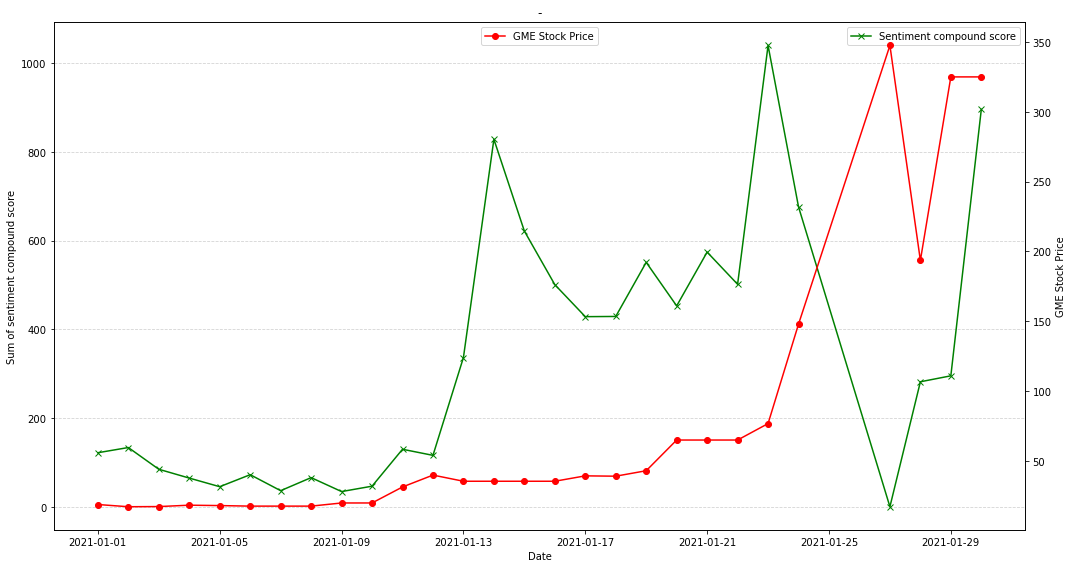

In [64]:
fig, ax = plt.subplots(figsize=(15,8))
ax2 = ax.twinx()
ax.set_title('-')
ax.set_xlabel('Date')
ax.plot(groupdfgme['Date'], groupdfgme['compound_score'], color='green', marker='x')
ax2.plot(groupdfgme['Date'], x_vals, color='red', marker='o')
ax.set_ylabel('Sum of sentiment compound score')
ax2.set_ylabel('GME Stock Price')
ax.legend(['Sentiment compound score'])
ax2.legend(['GME Stock Price'], loc='upper center')
ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
plt.show()

In [70]:
x_vals = gmeqeemat['Volume'][2:30]

In [71]:
np.corrcoef(groupdfgme['compound_score'],x_vals)

array([[1.        , 0.51994555],
       [0.51994555, 1.        ]])